# 图像滤波
滤波器：卷积核；


滤波的过程：卷积；


## 卷积基本概念
奇数为主： 3x3，7x7... (Padding+锚点在中间)

* 卷积核越大，感受野越大（信息大），但是计算量也大

* 锚点 ：正中心

* 边界扩充： 保证输出与输入相等大小

* 计算公式：
$N = \frac{(W-F+2 P)}{s} + 1$ 
 {N :输入大小。w:源大小；F卷积核大小；P扩充尺寸；S步长大小 }

* 步长 每次前进几格

In [1]:
import cv2 as cv
import numpy as  np

## 滤波
* 低通 ： 去除噪音/平滑图片
* 高通： 查找图像边缘

In [ ]:


# 实战卷积
#cv.filter2D(src,ddepth,kernel,anchor,delta,borderType)
img = cv.imread('test.png')

kernel = np.ones((5,5),np.float32)/25

out=cv.filter2D(img,-1,kernel)
cv.imshow('out',out)
cv.imshow('img',img)
cv.waitKey(0)




### 低通
K =$\alpha \left[\begin{array}{c} 1 &1 &1\\ 1 &1 &1\\1 &1 &1\\1 &1 &1\\... &... &...\\ \end{array}\right]$
$\alpha $ 
#### 方盒滤波
boxFilter()
#### 均值滤波
blur()


In [ ]:

# 实战卷积

img = cv.imread('test.png')





cv.imshow('img',img)
cv.waitKey(0)

#### 高斯滤波（中型。。）



In [ ]:
# GaussianBlur（）


#### 中值滤波
专治 胡椒噪音



In [ ]:
# mediaBlur()

#### 双边滤波
美颜

### 高通--边缘


* Sobel
* Scharr
* Laplacian
* Canny



# 形态学

* 腐蚀与膨胀
* 开运算
* 闭运算
* 顶帽
* 黑帽

### 图像全局二值化


In [ ]:
# binary   binary_Inv
# Trunc
# tozero   tozero_Inv
imgth =cv.imread('test.png')
cv.imshow('img',imgth)
imgth=cv.cvtColor(imgth,cv.COLOR_BGR2GRAY)
cv.imshow('gray',imgth)
ret,imgth2=cv.threshold(imgth,60,255,cv.THRESH_BINARY) # 
cv.imshow('bin',imgth2)
cv.waitKey(0)

### 阈值类型
  * binary : 高于阈值为 max，低于阈值 为min
  * Trunc： 高于阈值的均改为阈值，低于阈值不变（削峰操作）
  * tozero 低于阈值为0，否则保留


###  自适应阈值二值化
   光照不均匀导致阴影处不准
   

In [ ]:
# adap
#cv.adaptiveThreshold(src=,maxValue=,adaptiveMethod=邻近/高斯加权平均,thresholdType=阈值类型,blockSize=块大小,C=,dst=)


### Open CV 腐蚀
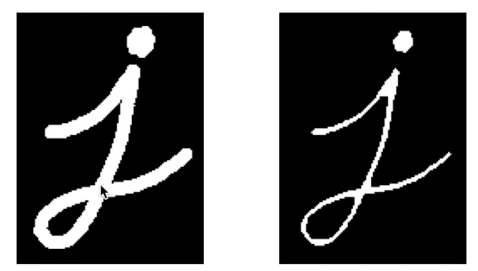

In [ ]:
#  cv.erode(img,kernel,iterations)
img = cv.imread('image/image copy.png')
kernel= np.ones((3,3),np.uint8)
output= cv.erode(img,kernel,iterations=3)
cv.imshow('img',img)
cv.imshow('output',output)
cv.waitKey(0)

### 获取形态学卷积核


In [ ]:
# cv.getStructuringElement(type,size)
# 卷积核类型
img = cv.imread('image/image copy.png')
# kernel= np.ones((3,3),np.uint8)
kernel1= cv.getStructuringElement(cv.MORPH_RECT,(7,7))
print(kernel1)
print('------------------------------')
kernel2= cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
print(kernel2)
print('------------------------------')
kernel3= cv.getStructuringElement(cv.MORPH_CROSS,(7,7))
print(kernel3)
print('------------------------------')
output= cv.erode(img,kernel1,iterations=1)
cv.imshow('img',img)
cv.imshow('output',output)
cv.waitKey(0)

### Open CV 膨胀

In [ ]:
# cv.dilate(img,kernel,iterations)
img = cv.imread('image/image copy.png')
# kernel= np.ones((3,3),np.uint8)
kernel1= cv.getStructuringElement(cv.MORPH_RECT,(7,7))
print(kernel1)
print('------------------------------')

output= cv.dilate(img,kernel1,iterations=3)
cv.imshow('img',img)
cv.imshow('output',output)
cv.waitKey(0)

* 卷积核是否可以全0？

In [ ]:
# cv.dilate(img,kernel,iterations)
img = cv.imread('image/image copy.png')
kernel1= np.zeros((3,3),np.uint8)
output= cv.dilate(img,kernel1,iterations=3)
cv.imshow('img',img)
cv.imshow('output',output)
cv.waitKey(0)

## 开运算  、闭运算
  开运算  = 先腐蚀，在膨胀
  
  闭运算  = 先膨胀，在腐蚀

In [ ]:
#cv.morphologyEx()
#


## 形态学梯度
 梯度= 原图 - 腐蚀图
 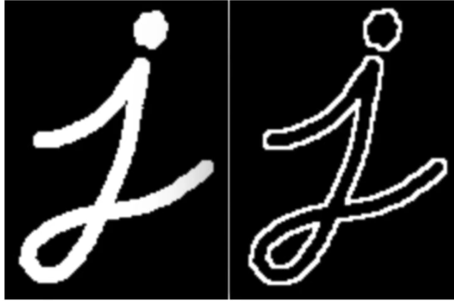

## 顶帽运算
顶帽运算 = 原图 - 开运算


## 黑帽运算
黑帽 = 原图 - 开运算

# 图像轮廓： 
具有相同颜色或强度的连续点的曲线

* 二值化/Canny 提高准确性

## 查找轮廓并绘制

In [ ]:
img=cv.imread('test02.png')
# 单通道
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) 

# 二值化
ret,binary=cv.threshold(gray,150,255,cv.THRESH_BINARY)

# 找轮廓
contours,hierarchy=cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

# 绘制
cv.drawContours(binary,contours,-1,(0,0,255),1)

cv.imshow('binary',binary)
cv.waitKey(0)

## 轮廓的面积和周长


In [ ]:
img=cv.imread('test02.png')
# 单通道
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) 

# 二值化
ret,binary=cv.threshold(gray,150,255,cv.THRESH_BINARY)

# 找轮廓
contours,hierarchy=cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

# 绘制
cv.drawContours(binary,contours,-1,(0,0,255),1)
#计算面积
area = cv.contourArea(contours[0])
print("area =%d"%(area))
# 周长
len = cv.arcLength(contours[0],True)
print("len =%d"%(len))
cv.imshow('binary',binary)
cv.waitKey(0)

## 多边形逼近 和 凸包


In [ ]:
def drawShape(src,points):
    i=0
    while i < len(points):
        if i == len(points) - 1 :
            x,y =points[i][0]
            x1,y1 = points[0][0]
            cv.line(src,(x,y),(x1,y1),(0,0,255),3)
        else:
             x,y =points[i][0]
             x1,y1 = points[i+1][0]
             cv.line(src,(x,y),(x1,y1),(0,0,255),3)
        i=i+1
img=cv.imread('image/image3.png')
# 单通道
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) 

# 二值化
ret,binary=cv.threshold(gray,150,255,cv.THRESH_BINARY)

# 找轮廓
contours,hierarchy=cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

# 绘制
cv.drawContours(img,contours,-1,(0,0,255),1)
e=20
approx = cv.approxPolyDP(contours[0],e,True)
drawShape(img,approx)

# 凸包
huff=cv.convexHull(contours[0])
drawShape(img,huff)


cv.imshow('img',img)
cv.waitKey(0)

## 外接矩阵
* min
* max


In [ ]:
def drawShape(src,points):
    i=0
    while i < len(points):
        if i == len(points) - 1 :
            x,y =points[i][0]
            x1,y1 = points[0][0]
            cv.line(src,(x,y),(x1,y1),(0,0,255),3)
        else:
             x,y =points[i][0]
             x1,y1 = points[i+1][0]
             cv.line(src,(x,y),(x1,y1),(0,0,255),3)
        i=i+1
img=cv.imread('image/image4.png')
# 单通道
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) 

# 二值化
ret,binary=cv.threshold(gray,150,255,cv.THRESH_BINARY)

# 找轮廓
contours,hierarchy=cv.findContours(binary,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)


r=cv.minAreaRect(contours[32])
box=cv.boxPoints(r) #
box =np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

x,y,w,h=cv.boundingRect(contours[32])
cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


cv.imshow('img',img)
cv.waitKey(0)